In [2]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from sklearn.datasets import make_gaussian_quantiles

real_cov = np.array([[.8, .3],
                     [.3, .4]])

rng = np.random.RandomState(0)

X = rng.multivariate_normal(mean=[0, 0],
                            cov=real_cov,
                            size=500)

print(X)

cov = EmpiricalCovariance().fit(X)

print(cov.covariance_)


print(cov.location_)


[[-1.61673103e+00 -6.43160191e-01]
 [-1.36314858e+00  5.14164922e-01]
 [-1.38812887e+00 -1.28529507e+00]
 [-7.86034162e-01 -5.04676250e-01]
 [-5.61249771e-03  2.24879216e-01]
 [-4.60253710e-01  5.60804197e-01]
 [-6.85715103e-01 -2.99453725e-01]
 [-4.60590696e-01 -6.13107859e-02]
 [-1.24368003e+00 -7.79460571e-01]
 [-7.33190019e-02 -5.13263866e-01]
 [ 2.05514920e+00  1.46264201e+00]
 [-5.75606736e-01 -7.19958346e-01]
 [-1.62551431e+00 -1.67712452e+00]
 [ 3.67933201e-03 -1.01918267e-01]
 [-1.66375840e+00 -7.49196195e-02]
 [-2.21207491e-01  9.14942469e-02]
 [ 1.22450080e+00 -4.44012793e-01]
 [ 2.64534522e-01  2.28348549e-01]
 [-1.34073074e+00 -5.02142606e-02]
 [ 4.04493432e-01  4.86997250e-02]
 [ 1.23394069e+00 -1.27727585e-01]
 [ 1.02398288e+00  1.63070299e+00]
 [ 5.41545047e-01  4.66940595e-02]
 [ 9.03035681e-01  9.14798626e-01]
 [ 1.44370731e+00  6.54577451e-01]
 [ 6.84448655e-01  5.81037411e-01]
 [ 7.13994032e-01 -2.73135054e-01]
 [-7.45470023e-02  1.97828642e-01]
 [-1.27317424e-01  9

In [4]:
import numpy as np
from sklearn.covariance import ShrunkCovariance
from sklearn.datasets import make_gaussian_quantiles

real_cov = np.array([[.8, .3],
                     [.3, .4]])

rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0, 0],
                                  cov=real_cov,
                                  size=500)

cov = ShrunkCovariance().fit(X)
print(cov.covariance_)


print(cov.location_)

[[0.73873308 0.25367968]
 [0.25367968 0.41108678]]
[0.06228968 0.01937939]


Automatically created module for IPython interactive environment
----- base_X_train -------
(20, 40)
----- base_X_test -------
(20, 40)
----- coloring_matrix -------
(40, 40)
----- X_train -------
(20, 40)
----- X_test -------
(20, 40)
----- shrinkages -------
[0.01       0.01172102 0.01373824 0.01610262 0.01887392 0.02212216
 0.02592944 0.03039195 0.03562248 0.04175319 0.04893901 0.05736153
 0.06723358 0.07880463 0.09236709 0.10826367 0.1268961  0.14873521
 0.17433288 0.20433597 0.23950266 0.28072162 0.32903446 0.38566204
 0.45203537 0.52983169 0.62101694 0.72789538 0.85316785 1.        ]
----- negative_logliks -------
[635.3495919178638, 555.48463578149, 487.57110050041933, 429.85142860283906, 380.8258947680093, 339.2147677320299, 303.92604225815575, 274.0279254840194, 248.72538098304247, 227.34013496764317, 209.29363486907917, 194.0925234252398, 181.31625354799732, 170.60652258285873, 161.6582508503172, 154.21187002809856, 148.0467231331902, 142.97541043863896, 138.838945345419, 135

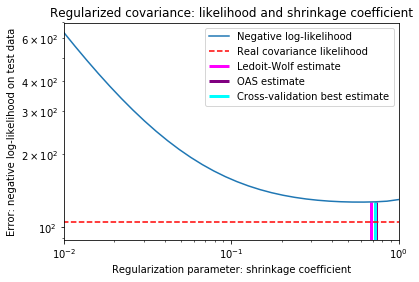

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.covariance import LedoitWolf, OAS, ShrunkCovariance, \
    log_likelihood, empirical_covariance

from sklearn.model_selection import GridSearchCV


# #############################################################################
# Generate sample data
n_features, n_samples = 40, 20

np.random.seed(42)

base_X_train = np.random.normal(size=(n_samples, n_features))
base_X_test = np.random.normal(size=(n_samples, n_features))

print("----- base_X_train -------")
print(base_X_train.shape)

print("----- base_X_test -------")
print(base_X_test.shape)




# Color samples
coloring_matrix = np.random.normal(size=(n_features, n_features))

print("----- coloring_matrix -------")
print(coloring_matrix.shape)


X_train = np.dot(base_X_train, coloring_matrix)
X_test = np.dot(base_X_test, coloring_matrix)

print("----- X_train -------")
print(X_train.shape)


print("----- X_test -------")
print(X_test.shape)




# #############################################################################
# Compute the likelihood on test data

# spanning a range of possible shrinkage coefficient values
shrinkages = np.logspace(-2, 0, 30)
print("----- shrinkages -------")
print(shrinkages)


negative_logliks = [-ShrunkCovariance(shrinkage=s).fit(X_train).score(X_test)
                    for s in shrinkages]
print("----- negative_logliks -------")
print(negative_logliks)


# under the ground-truth model, which we would not have access to in real
# settings
real_cov = np.dot(coloring_matrix.T, coloring_matrix)
emp_cov = empirical_covariance(X_train)

print("----- real_cov -------")
print(real_cov)
print("----- emp_cov -------")
print(emp_cov)

loglik_real = -log_likelihood(emp_cov, linalg.inv(real_cov))
print("----- loglik_real -------")
print(loglik_real)


# #############################################################################
# Compare different approaches to setting the parameter

# GridSearch for an optimal shrinkage coefficient
tuned_parameters = [{'shrinkage': shrinkages}]
cv = GridSearchCV(ShrunkCovariance(), tuned_parameters)
cv.fit(X_train)

# Ledoit-Wolf optimal shrinkage coefficient estimate
lw = LedoitWolf()
loglik_lw = lw.fit(X_train).score(X_test)

# OAS coefficient estimate
oa = OAS()
loglik_oa = oa.fit(X_train).score(X_test)

# #############################################################################
# Plot results
fig = plt.figure()
plt.title("Regularized covariance: likelihood and shrinkage coefficient")
plt.xlabel('Regularization parameter: shrinkage coefficient')
plt.ylabel('Error: negative log-likelihood on test data')
# range shrinkage curve
plt.loglog(shrinkages, negative_logliks, label="Negative log-likelihood")

plt.plot(plt.xlim(), 2 * [loglik_real], '--r',
         label="Real covariance likelihood")

# adjust view
lik_max = np.amax(negative_logliks)
lik_min = np.amin(negative_logliks)
ymin = lik_min - 6. * np.log((plt.ylim()[1] - plt.ylim()[0]))
ymax = lik_max + 10. * np.log(lik_max - lik_min)
xmin = shrinkages[0]
xmax = shrinkages[-1]
# LW likelihood
plt.vlines(lw.shrinkage_, ymin, -loglik_lw, color='magenta',
           linewidth=3, label='Ledoit-Wolf estimate')
# OAS likelihood
plt.vlines(oa.shrinkage_, ymin, -loglik_oa, color='purple',
           linewidth=3, label='OAS estimate')
# best CV estimator likelihood
plt.vlines(cv.best_estimator_.shrinkage, ymin,
           -cv.best_estimator_.score(X_test), color='cyan',
           linewidth=3, label='Cross-validation best estimate')

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.legend()

plt.show()

Automatically created module for IPython interactive environment


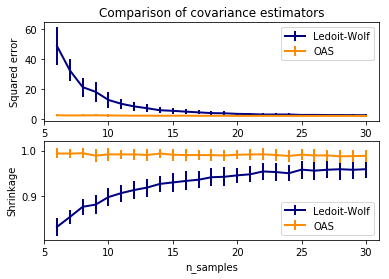

In [10]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, cholesky

from sklearn.covariance import LedoitWolf, OAS

np.random.seed(0)

n_features = 100
# simulation covariance matrix (AR(1) process)
r = 0.1
real_cov = toeplitz(r ** np.arange(n_features))
coloring_matrix = cholesky(real_cov)

n_samples_range = np.arange(6, 31, 1)
repeat = 100
lw_mse = np.zeros((n_samples_range.size, repeat))
oa_mse = np.zeros((n_samples_range.size, repeat))
lw_shrinkage = np.zeros((n_samples_range.size, repeat))
oa_shrinkage = np.zeros((n_samples_range.size, repeat))
for i, n_samples in enumerate(n_samples_range):
    for j in range(repeat):
        X = np.dot(
            np.random.normal(size=(n_samples, n_features)), coloring_matrix.T)

        lw = LedoitWolf(store_precision=False, assume_centered=True)
        lw.fit(X)
        lw_mse[i, j] = lw.error_norm(real_cov, scaling=False)
        lw_shrinkage[i, j] = lw.shrinkage_

        oa = OAS(store_precision=False, assume_centered=True)
        oa.fit(X)
        oa_mse[i, j] = oa.error_norm(real_cov, scaling=False)
        oa_shrinkage[i, j] = oa.shrinkage_

# plot MSE
plt.subplot(2, 1, 1)
plt.errorbar(n_samples_range, lw_mse.mean(1), yerr=lw_mse.std(1),
             label='Ledoit-Wolf', color='navy', lw=2)
plt.errorbar(n_samples_range, oa_mse.mean(1), yerr=oa_mse.std(1),
             label='OAS', color='darkorange', lw=2)
plt.ylabel("Squared error")
plt.legend(loc="upper right")
plt.title("Comparison of covariance estimators")
plt.xlim(5, 31)

# plot shrinkage coefficient
plt.subplot(2, 1, 2)
plt.errorbar(n_samples_range, lw_shrinkage.mean(1), yerr=lw_shrinkage.std(1),
             label='Ledoit-Wolf', color='navy', lw=2)
plt.errorbar(n_samples_range, oa_shrinkage.mean(1), yerr=oa_shrinkage.std(1),
             label='OAS', color='darkorange', lw=2)
plt.xlabel("n_samples")
plt.ylabel("Shrinkage")
plt.legend(loc="lower right")
plt.ylim(plt.ylim()[0], 1. + (plt.ylim()[1] - plt.ylim()[0]) / 10.)
plt.xlim(5, 31)

plt.show()

In [12]:
import numpy as np
from sklearn.covariance import GraphicalLassoCV

true_cov = np.array([[0.8, 0.0, 0.2, 0.0],
                     [0.0, 0.4, 0.0, 0.0],
                     [0.2, 0.0, 0.3, 0.1],
                     [0.0, 0.0, 0.1, 0.7]])

np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0, 0, 0],
                                  cov=true_cov,
                                  size=200)

cov = GraphicalLassoCV().fit(X)
print(np.around(cov.covariance_, decimals=3))


np.around(cov.location_, decimals=3)

[[0.816 0.051 0.22  0.017]
 [0.051 0.364 0.018 0.036]
 [0.22  0.018 0.322 0.094]
 [0.017 0.036 0.094 0.69 ]]


array([0.073, 0.04 , 0.038, 0.143])

Automatically created module for IPython interactive environment


AttributeError: 'GraphicalLassoCV' object has no attribute 'cv_results_'

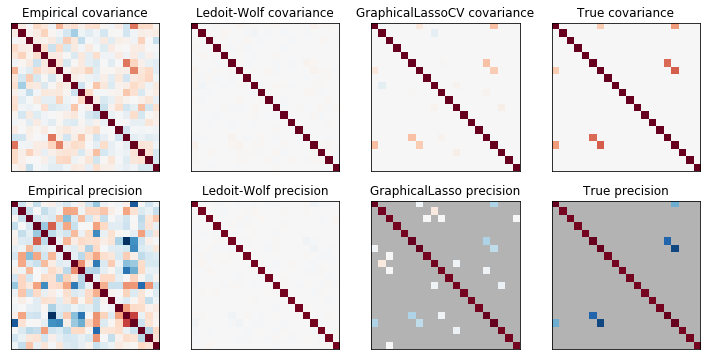

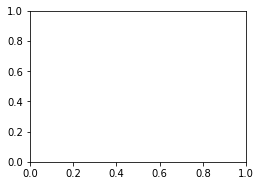

In [13]:
print(__doc__)
# author: Gael Varoquaux <gael.varoquaux@inria.fr>
# License: BSD 3 clause
# Copyright: INRIA

import numpy as np
from scipy import linalg
from sklearn.datasets import make_sparse_spd_matrix
from sklearn.covariance import GraphicalLassoCV, ledoit_wolf
import matplotlib.pyplot as plt

# #############################################################################
# Generate the data
n_samples = 60
n_features = 20

prng = np.random.RandomState(1)
prec = make_sparse_spd_matrix(n_features, alpha=.98,
                              smallest_coef=.4,
                              largest_coef=.7,
                              random_state=prng)
cov = linalg.inv(prec)
d = np.sqrt(np.diag(cov))
cov /= d
cov /= d[:, np.newaxis]
prec *= d
prec *= d[:, np.newaxis]
X = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)
X -= X.mean(axis=0)
X /= X.std(axis=0)

# #############################################################################
# Estimate the covariance
emp_cov = np.dot(X.T, X) / n_samples

model = GraphicalLassoCV()
model.fit(X)
cov_ = model.covariance_
prec_ = model.precision_

lw_cov_, _ = ledoit_wolf(X)
lw_prec_ = linalg.inv(lw_cov_)

# #############################################################################
# Plot the results
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.02, right=0.98)

# plot the covariances
covs = [('Empirical', emp_cov), ('Ledoit-Wolf', lw_cov_),
        ('GraphicalLassoCV', cov_), ('True', cov)]
vmax = cov_.max()
for i, (name, this_cov) in enumerate(covs):
    plt.subplot(2, 4, i + 1)
    plt.imshow(this_cov, interpolation='nearest', vmin=-vmax, vmax=vmax,
               cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.title('%s covariance' % name)


# plot the precisions
precs = [('Empirical', linalg.inv(emp_cov)), ('Ledoit-Wolf', lw_prec_),
         ('GraphicalLasso', prec_), ('True', prec)]
vmax = .9 * prec_.max()
for i, (name, this_prec) in enumerate(precs):
    ax = plt.subplot(2, 4, i + 5)
    plt.imshow(np.ma.masked_equal(this_prec, 0),
               interpolation='nearest', vmin=-vmax, vmax=vmax,
               cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.title('%s precision' % name)
    if hasattr(ax, 'set_facecolor'):
        ax.set_facecolor('.7')
    else:
        ax.set_axis_bgcolor('.7')

# plot the model selection metric
plt.figure(figsize=(4, 3))
plt.axes([.2, .15, .75, .7])
plt.plot(model.cv_results_["alphas"], model.cv_results_["mean_score"], 'o-')
plt.axvline(model.alpha_, color='.5')
plt.title('Model selection')
plt.ylabel('Cross-validation score')
plt.xlabel('alpha')

plt.show()

Automatically created module for IPython interactive environment


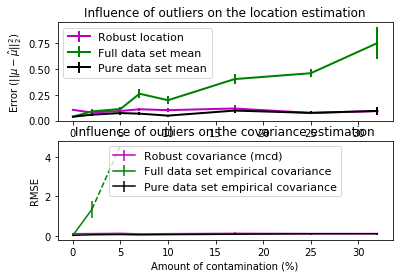

In [15]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn.covariance import EmpiricalCovariance, MinCovDet

# example settings
n_samples = 80
n_features = 5
repeat = 10

range_n_outliers = np.concatenate(
    (np.linspace(0, n_samples / 8, 5),
     np.linspace(n_samples / 8, n_samples / 2, 5)[1:-1])).astype(int)

# definition of arrays to store results
err_loc_mcd = np.zeros((range_n_outliers.size, repeat))
err_cov_mcd = np.zeros((range_n_outliers.size, repeat))
err_loc_emp_full = np.zeros((range_n_outliers.size, repeat))
err_cov_emp_full = np.zeros((range_n_outliers.size, repeat))
err_loc_emp_pure = np.zeros((range_n_outliers.size, repeat))
err_cov_emp_pure = np.zeros((range_n_outliers.size, repeat))

# computation
for i, n_outliers in enumerate(range_n_outliers):
    for j in range(repeat):

        rng = np.random.RandomState(i * j)

        # generate data
        X = rng.randn(n_samples, n_features)
        # add some outliers
        outliers_index = rng.permutation(n_samples)[:n_outliers]
        outliers_offset = 10. * \
            (np.random.randint(2, size=(n_outliers, n_features)) - 0.5)
        X[outliers_index] += outliers_offset
        inliers_mask = np.ones(n_samples).astype(bool)
        inliers_mask[outliers_index] = False

        # fit a Minimum Covariance Determinant (MCD) robust estimator to data
        mcd = MinCovDet().fit(X)
        # compare raw robust estimates with the true location and covariance
        err_loc_mcd[i, j] = np.sum(mcd.location_ ** 2)
        err_cov_mcd[i, j] = mcd.error_norm(np.eye(n_features))

        # compare estimators learned from the full data set with true
        # parameters
        err_loc_emp_full[i, j] = np.sum(X.mean(0) ** 2)
        err_cov_emp_full[i, j] = EmpiricalCovariance().fit(X).error_norm(
            np.eye(n_features))

        # compare with an empirical covariance learned from a pure data set
        # (i.e. "perfect" mcd)
        pure_X = X[inliers_mask]
        pure_location = pure_X.mean(0)
        pure_emp_cov = EmpiricalCovariance().fit(pure_X)
        err_loc_emp_pure[i, j] = np.sum(pure_location ** 2)
        err_cov_emp_pure[i, j] = pure_emp_cov.error_norm(np.eye(n_features))

# Display results
font_prop = matplotlib.font_manager.FontProperties(size=11)
plt.subplot(2, 1, 1)
lw = 2
plt.errorbar(range_n_outliers, err_loc_mcd.mean(1),
             yerr=err_loc_mcd.std(1) / np.sqrt(repeat),
             label="Robust location", lw=lw, color='m')
plt.errorbar(range_n_outliers, err_loc_emp_full.mean(1),
             yerr=err_loc_emp_full.std(1) / np.sqrt(repeat),
             label="Full data set mean", lw=lw, color='green')
plt.errorbar(range_n_outliers, err_loc_emp_pure.mean(1),
             yerr=err_loc_emp_pure.std(1) / np.sqrt(repeat),
             label="Pure data set mean", lw=lw, color='black')
plt.title("Influence of outliers on the location estimation")
plt.ylabel(r"Error ($||\mu - \hat{\mu}||_2^2$)")
plt.legend(loc="upper left", prop=font_prop)

plt.subplot(2, 1, 2)
x_size = range_n_outliers.size
plt.errorbar(range_n_outliers, err_cov_mcd.mean(1),
             yerr=err_cov_mcd.std(1),
             label="Robust covariance (mcd)", color='m')
plt.errorbar(range_n_outliers[:(x_size // 5 + 1)],
             err_cov_emp_full.mean(1)[:(x_size // 5 + 1)],
             yerr=err_cov_emp_full.std(1)[:(x_size // 5 + 1)],
             label="Full data set empirical covariance", color='green')
plt.plot(range_n_outliers[(x_size // 5):(x_size // 2 - 1)],
         err_cov_emp_full.mean(1)[(x_size // 5):(x_size // 2 - 1)],
         color='green', ls='--')
plt.errorbar(range_n_outliers, err_cov_emp_pure.mean(1),
             yerr=err_cov_emp_pure.std(1),
             label="Pure data set empirical covariance", color='black')
plt.title("Influence of outliers on the covariance estimation")
plt.xlabel("Amount of contamination (%)")
plt.ylabel("RMSE")
plt.legend(loc="upper center", prop=font_prop)

plt.show()